In [70]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [96]:
with open('dataframes/df_under001.p','rb') as read_file:
    df = pickle.load(read_file)
df.head()

# df.rename(columns={'business_per_sqmi':'bus_within_001', 'coffee_per_sqmi':'cof_within_001',
#                    '0_x':'closest_el', '1_x':'dist_to_closest_el', 
#                    2:'daily_rides_closest_el', '0_y':'best_shops_under_001',
#                    0:'block_lat', '1_y':'block_lon'}, inplace=True)
# df = df.drop(columns = ['CENSUS BLOCK', 'block_lat', 'block_lon', 'closest_el'])



,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,closest_el,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count
0,101001000,128,2,0,Jarvis,0.009465,1347.408038,0,42.022564,-87.666316,0
1,101001001,71,0,0,Jarvis,0.007069,1347.408038,0,42.022424,-87.668571,0
2,101001002,45,0,0,Jarvis,0.006355,1347.408038,0,42.022033,-87.668894,3
3,101001003,335,0,0,Jarvis,0.005944,1347.408038,0,42.021412,-87.668684,0
4,101002000,152,0,0,Howard,0.005396,5357.830394,0,42.022552,-87.670984,3


In [82]:
df.head()

,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,crime_count
0,128,2,0,0.009465,1347.408038,0,0
1,71,0,0,0.007069,1347.408038,0,0
2,45,0,0,0.006355,1347.408038,0,3
3,335,0,0,0.005944,1347.408038,0,0
4,152,0,0,0.005396,5357.830394,0,3


In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [97]:
df_no_dailyrides = df.drop(columns = ['daily_rides_closest_el', 'best_shops_under_001',
                                     'CENSUS BLOCK', 'block_lat', 'block_lon', 'closest_el'], axis=1)
X = StandardScaler().fit_transform(df_no_dailyrides)
km = KMeans(n_clusters=6)
km.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 4.56397972,  5.52518367,  2.66136088,  1.01247807,  2.53420713,
        13.3217569 ],
       [ 5.20791112,  5.58246854,  2.59203603,  0.73140762,  2.56012181,
        13.50686135],
       [ 5.42434291,  5.48136222,  2.67939864,  0.87373312,  1.84818221,
        13.03477118],
       ...,
       [ 6.26064303,  5.87193369,  0.48305277,  1.93438068,  2.97059297,
        13.47969177],
       [ 6.32855819,  5.99563544,  0.52296827,  2.03322982,  3.26574159,
        13.75562053],
       [10.30890812,  4.55617216,  8.37731598,  8.60013847,  8.89150008,
        12.00233189]])

In [92]:
y = np.bincount(km.labels_)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T


array([[    0, 30597],
       [    1,  9890],
       [    2,  1103],
       [    3,   601],
       [    4,   197],
       [    5,  3903]])

In [94]:
print(list(df_no_dailyrides))
km.cluster_centers_

['TOTAL POPULATION', 'bus_within_001', 'cof_within_001', 'dist_to_closest_el', 'crime_count']


array([[-0.03960005, -0.16037951, -0.14960802, -0.39982267, -0.18607113],
       [-0.17946453, -0.23863267, -0.14960802,  1.56539755, -0.30071708],
       [-0.07217186,  1.80691134,  4.87039033, -0.64641681,  0.54112715],
       [ 5.29430646,  0.27321079,  0.04523043, -0.63021918,  0.3141092 ],
       [-0.06690695,  8.95353163,  6.30393871, -1.04432146,  6.83629114],
       [-0.02631259,  0.85704451, -0.14960802, -0.49932151,  1.67382612]])

In [95]:
km.inertia_

102097.3156156695

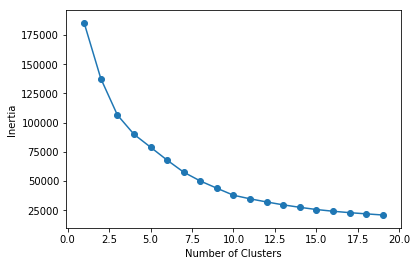

In [72]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
silhouette_score(X,km.labels_)

0.31352572227085945

0.7497537956708267
0.4215350072558612
0.4456229593044397
0.4493716272541559
0.4647153158250215
0.37825172000464835
0.35394327843188256
0.37218345881854725
0.3747986204920577
0.3795341955727211
0.33085882824540486
0.3344898036393303
0.3355162589665403
0.33851676796275615
0.32238107526771465
0.32599044676749395
0.32704236046842433
0.3148196243833725


Text(0, 0.5, 'Silhouette')

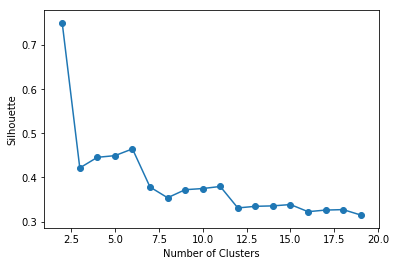

In [79]:
silhouette = []
list_num_clusters = list(range(2,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    silhouette.append(silhouette_score(X,km.labels_))
    print(silhouette_score(X,km.labels_))
    
plt.plot(list_num_clusters,silhouette)
plt.scatter(list_num_clusters,silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')

In [98]:
labels_6klust = list(km.labels_)

In [103]:
df['labels'] = labels_6klust

In [105]:
df.to_csv('../visualization/kmeans_map/df_with_labels.csv')

In [106]:
df['labels'].value_counts()

3    30591
2     9888
4     3898
1     1103
0      614
5      197
Name: labels, dtype: int64